<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/week-9/Week%209/Analysis_of_KMeans_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data source comes from https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means



In [151]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [152]:
#Load Data
fpath="/content/drive/MyDrive/CodingDojo/03-AdvancedML/Week09/Data/cust_seg.csv"
df = pd.read_csv(fpath)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [153]:
# df.drop(columns=["Customer Id", "Unnamed: 0"], inplace=True)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [154]:
#Looking for missing values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [155]:
#Finding which features have missing values
df.isna().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [156]:
#dropping inconsequential columns
df.drop(columns=["Unnamed: 0", "Customer Id"], inplace=True)

In [157]:
#Creating different subsets of our data
cluster1 = df[["Age","Edu","Income"]]
cluster2 = df[["Years Employed", "Card Debt", "Other Debt"]]
cluster3 = df[["Defaulted", "DebtIncomeRatio"]]

In [158]:
#Instantiate Scaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
#Instantiate Imputer for missing values in `defaulted column`
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(scaled_df)
scaled_df = imputer.transform(scaled_df)

In [159]:
# Fit & transforming each cluster of our data
scaled_cluster1 = scaler.fit_transform(cluster1)
scaled_cluster2 = scaler.fit_transform(cluster2)
scaled_cluster3 = scaler.fit_transform(cluster3)

# Inertia vs. Clusters

In [160]:
def plot_kmeans(scaled_cluster):
    #Create an empty list of inertias
    inertias = []
    #Loop through k values between 2 and 10 and store the inertias in the list.
    for k in range(2,11):
        kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
        kmeans.fit(scaled_cluster)
        # KMeans stores the inertia of the clustering as an attribute we can directly access after the model is fitted
        inertias.append(kmeans.inertia_)
    #Visualize Scores
    plt.plot(range(2,11), inertias, marker=".")
    plt.xlabel("clusters")
    plt.ylabel("inertia")

The best clustering is a balance between the lowest number of clusters and the lowest inertia.



The best elbow is at 4 with an inertia score of 1400 for subset cluster1.

Clearly the elbow is at 4 with a ~900 inertia score for Cluster 2.

In [161]:
#Instantiate Imputer for missing values in `defaulted column`
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(scaled_cluster3)
imputed_cluster3 = imputer.transform(scaled_cluster3)

The elbow is at 5 clusters with an inertia score of ~250 for subset cluster 3.

# Silhouette Score

In [162]:
def plot_sil(scaled_cluster):
    # Visualize different silhouette scores
    # Save silhouette scores for various cluster numbers in list
    silhouette_scores = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i, n_init="auto", random_state=42)
        kmeans.fit(scaled_cluster)
        silhouette_scores.append(silhouette_score(scaled_cluster, kmeans.labels_))
    # Visualize scores
    plt.plot(range(2,11), silhouette_scores, marker=".")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score");

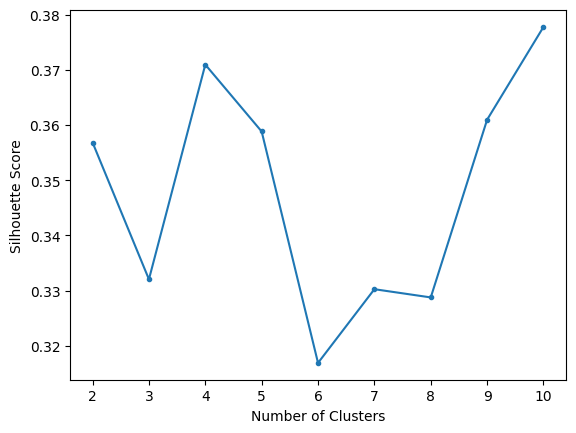

In [163]:
#Plotting Cluster 1 with custom Silhoutte Score function
plot_sil(scaled_cluster1)

The best score is 4 (signaling well-defined & well-separated clusters), and the worst is -1.

In Cluster1, our best cluster is 4 because it has the highest Silhouette Score of ~.38. However, another good Silhoutte score is 10 clusters, followed by 3 clusters.

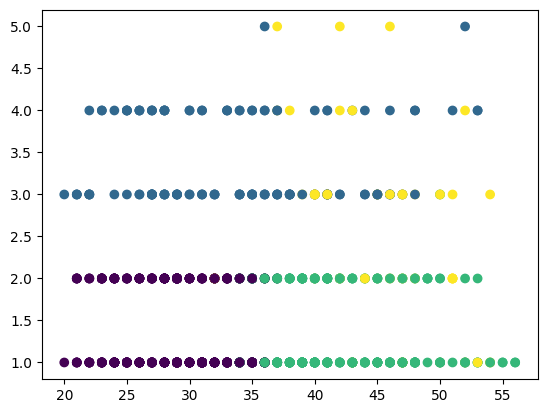

In [164]:
#Plotting features at 4 clusters
kmeans1 = KMeans(n_clusters=4, n_init="auto")
kmeans1.fit(scaled_cluster1)
kmeans1.labels_
#Creating new column
df["cluster1"] = kmeans1.labels_
#Create Scatterplot at 4 clusters
fig, ax = plt.subplots()
ax.scatter(df['Age'], df['Edu'], c = df['cluster1'])
ax.set_xlabel=("Ages")
ax.set_ylabel=("Education");

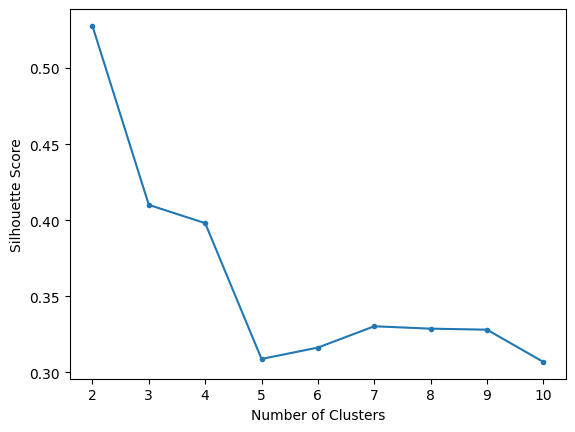

In [165]:
#Plotting Cluster 2 using custom Silhoutte Score function
plot_sil(scaled_cluster2)

Cluster 2's best Silhoutte Score is at 2 clusters with a Silhoutte Score of ~.50.

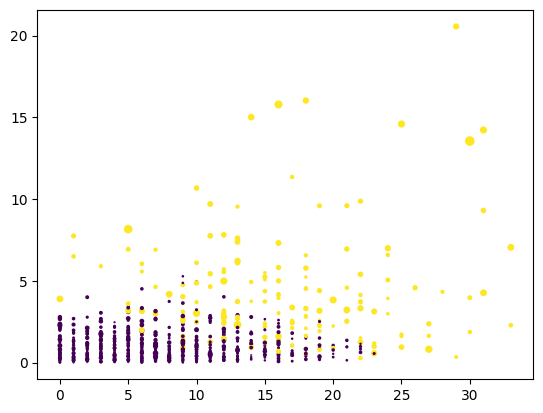

In [166]:
#Plotting features at 2 clusters
kmeans2 = KMeans(n_clusters=2, n_init="auto")
kmeans2.fit(scaled_cluster2)
kmeans2.labels_
#Creating new column
df["cluster2"] = kmeans2.labels_
#Create Scatterplot at 2 clusters
fig, ax = plt.subplots()
ax.scatter(df["Years Employed"], df["Card Debt"], df["Other Debt"], c = df['cluster2']);

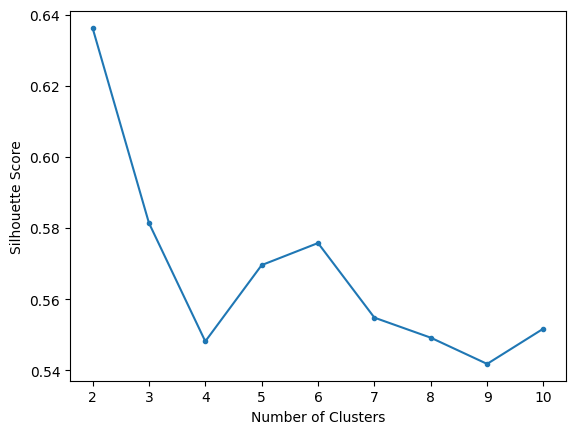

In [167]:
#Plotting an imputered Cluster via custom Silhoutte function
plot_sil(imputed_cluster3)

Cluster 3's best Silhoutte Score is at 2 clusters with ~.64.

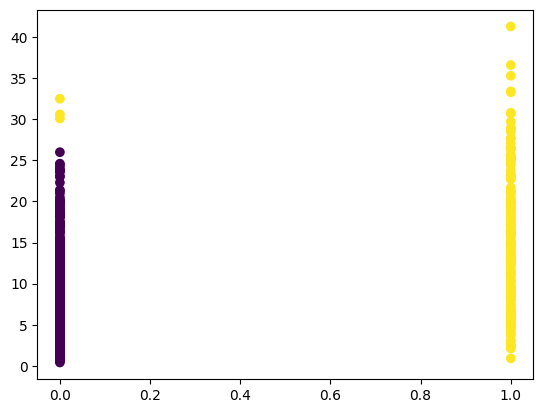

In [176]:
#Plotting features at 4 clusters
kmeans3 = KMeans(n_clusters=2, n_init="auto")
kmeans3.fit(imputed_cluster3)
kmeans3.labels_
#Creating new column
df["cluster3"] = kmeans3.labels_
#Create Scatterplot at 4 clusters
fig, ax = plt.subplots()
ax.scatter(df["Defaulted"], df["DebtIncomeRatio"], c = df['cluster3'])
ax.set_xlabel=("Defaulted")
ax.set_ylabel=("Debt Income Ratio");

## The best number of cluster is 4 because most of the models have the best inertia and silhoutte scores around 4 clusters.


# Assigning a Cluster & Make a New Column

In [169]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
kmeans.fit(scaled_df)
# Add the clusters as a column in the dataframe
df["clusters"] = kmeans.labels_

In [170]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
clusters_col = df.groupby("clusters", as_index=False).mean()
clusters_col

,clusters,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster1,cluster2,cluster3
0,0,41.774194,1.585253,15.834101,69.239631,1.761797,3.710355,0.017964,9.011982,1.788018,0.400922,0.018433
1,1,31.582822,1.871166,3.840491,31.159509,1.574712,2.776061,0.987654,14.044172,0.570552,0.092025,0.987730
2,2,31.898551,1.635266,5.562802,30.367150,0.747732,1.658884,0.000000,8.150483,0.570048,0.004831,0.000000
3,3,42.071429,2.285714,16.357143,124.964286,6.995500,12.009536,0.454545,18.335714,2.196429,1.000000,0.428571


# Visualizing the Clusters


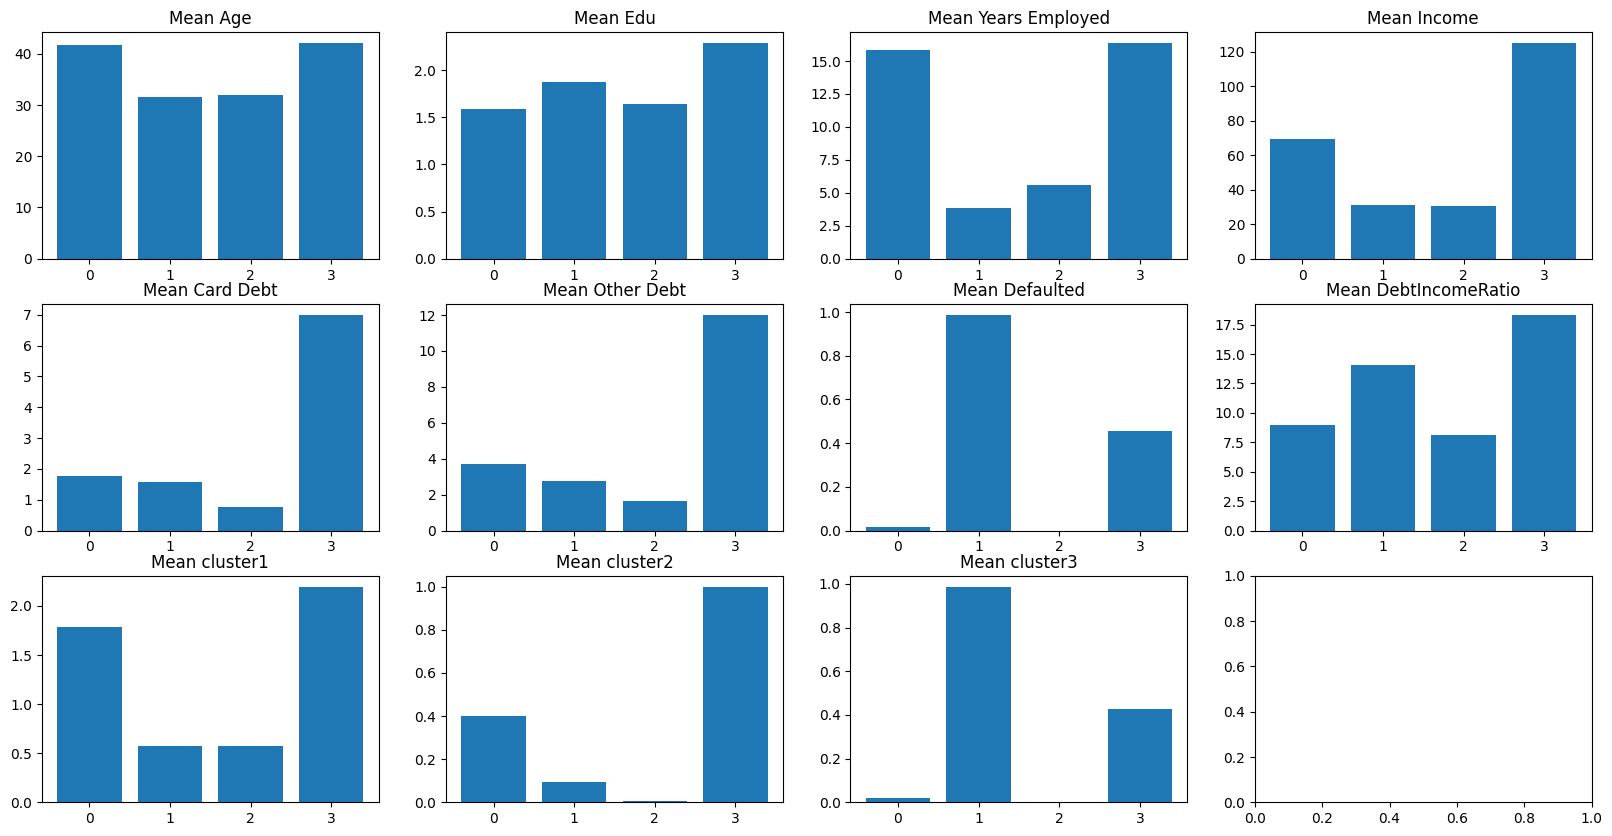

In [174]:
# Visualize means
# # fig is an array of dimensions 2,4. axes.ravel() will flatten it to 12,1
fig, axes = plt.subplots(3,4, figsize=(20,10))
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(clusters_col.columns[1:]):
    axes[i].bar(clusters_col["clusters"], clusters_col[col])
    axes[i].set_title(f"Mean {col}")

# Analysed Results

* **Cluster 1**
    * Older
    * High Edu,
    * high yrs employed,
    * 2nd highest income,
    * little debt, hardly defaults
    * Medium Debt/Income Ratio
    They may be a good candidate for targeted credit card campaign.
* **Cluster 2**
    * Youngest,
    * Average Education
    * entering employment market,
    * low income,
    * less debt than cluster 1,
    * very high default
    * High Debt/Income Ratio
    Not suitable for targeted credit card campaign.
* **Cluster 3**
    * 2nd oldest
    * Average Edu
    * Midlevel Career,
    * Low Income,
    * Very Low Debt
    * No default
    * Lower Debt/Income Ratio
    They may also be a good candidate for targeted credit card campaign.
* **Cluster 4**
    * Oldest
    * High Edu
    * Long Employment
    * Very high income
    * High Debt
    * Moderate Default
    * High Debt/Income Ratio
    Not suitable for targeted credit card campaign.




# Recommendations

Based off the stats, the middle age group has, on average, a higher education rate with steady employment and steady income. Their debt is small and they dont have high default rates. Something to note, Cluster 1 has higher income so they may be good candidates for higher credit lines than Cluster 3.